In [1]:
import MDAnalysis
import MDAnalysis.analysis.msd as msd
import MDAnalysis.analysis.rdf as rdf

import numpy as np
import matplotlib.pyplot as plt

/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
cd '/scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week9/Inputs/prod'

/scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week9/Inputs/prod


##  rdfs

In [5]:
traj_files = [
    'kalj_T0.475_n360_v300_prod_30000000_1.unwrap.dcd',
    'kalj_T0.5_n360_v300_prod_10000000_1.unwrap.dcd',
    'kalj_T0.55_n360_v300_prod_3000000_1.unwrap.dcd',
    'kalj_T0.65_n360_v300_prod_350000_1.unwrap.dcd',
    'kalj_T0.7_n360_v300_prod_180000_1.unwrap.dcd',
    'kalj_T0.8_n360_v300_prod_150000_1.unwrap.dcd',
    'kalj_T0.9_n360_v300_prod_150000_1.unwrap.dcd',
    'kalj_T1_n360_v300_prod_50000_1.unwrap.dcd',
    'kalj_T1.5_n360_v300_prod_10000_1.unwrap.dcd'
]

temps = [0.475, 0.5, 0.55, 0.65, 0.7, 0.8, 0.9, 1, 1.5]

rdf_vals = []

for t in traj_files: 
    
    u = MDAnalysis.Universe("kalj_T0.475_n360_v300_30000000_1.lammpstrj", t, topology_format="LAMMPSDUMP")
        
    ag1 = u.select_atoms('type 1')
    ag2 = u.select_atoms('type 2')

    RDF = rdf.InterRDF(ag1, ag2)
    RDF.run()

    rdf_vals.append([RDF.results.bins, RDF.results.rdf])

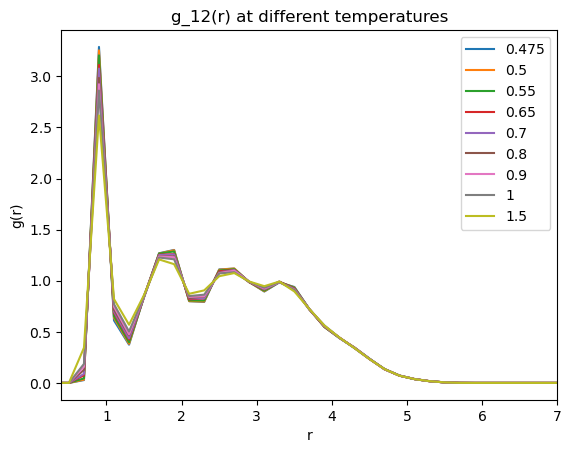

In [12]:
for i, (x, y) in enumerate(rdf_vals):
    plt.plot(x, y, label=f'{temps[i]}')

plt.legend()
plt.xlim(0.4, 7)
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('g_12(r) at different temperatures')
plt.savefig('g_12(r)')
plt.show()

In [13]:
rdf_vals = []

for t in traj_files: 
    
    u = MDAnalysis.Universe("kalj_T0.475_n360_v300_30000000_1.lammpstrj", t, topology_format="LAMMPSDUMP")
        
    ag1 = u.select_atoms('type 1')
    ag2 = u.select_atoms('type 1')

    RDF = rdf.InterRDF(ag1, ag2)
    RDF.run()

    rdf_vals.append([RDF.results.bins, RDF.results.rdf])

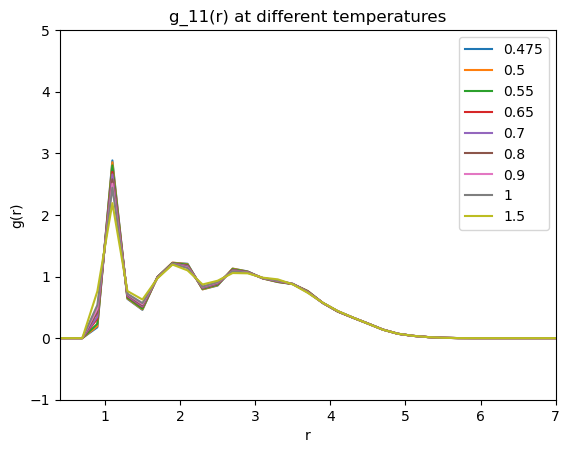

In [16]:
for i, (x, y) in enumerate(rdf_vals):
    plt.plot(x, y, label=f'{temps[i]}')

plt.legend()
plt.xlim(0.4, 7)
plt.ylim(-1, 5)
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('g_11(r) at different temperatures')
plt.savefig('g_11(r)')
plt.show()

In [17]:
rdf_vals = []

for t in traj_files: 
    
    u = MDAnalysis.Universe("kalj_T0.475_n360_v300_30000000_1.lammpstrj", t, topology_format="LAMMPSDUMP")
        
    ag1 = u.select_atoms('type 2')
    ag2 = u.select_atoms('type 2')

    RDF = rdf.InterRDF(ag1, ag2)
    RDF.run()

    rdf_vals.append([RDF.results.bins, RDF.results.rdf])

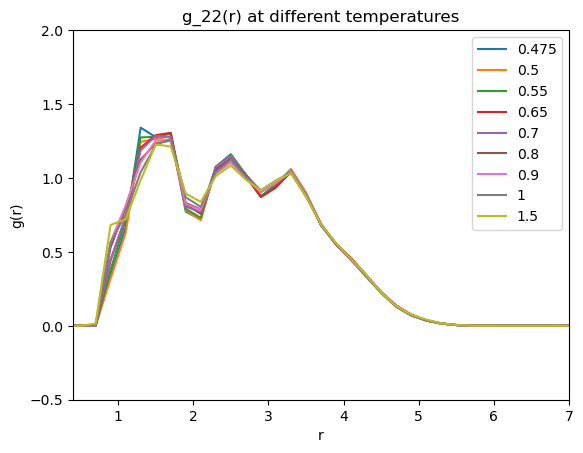

In [21]:
for i, (x, y) in enumerate(rdf_vals):
    plt.plot(x, y, label=f'{temps[i]}')

plt.legend()
plt.xlim(0.4, 7)
plt.ylim(-0.5, 2)
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('g_22(r) at different temperatures')
plt.savefig('g_22(r)')
plt.show()

## mean squared displacement

In [48]:
msd_vals = []

for t in traj_files: 
    
    u = MDAnalysis.Universe("kalj_T0.475_n360_v300_30000000_1.lammpstrj", t, topology_format="LAMMPSDUMP")
    
    MSD = msd.EinsteinMSD(u, select='type 1', msd_type='xyz', fft=True) 
    MSD.run()
    
    nframes = MSD.n_frames
    
    msd_vals.append(MSD.results.timeseries)

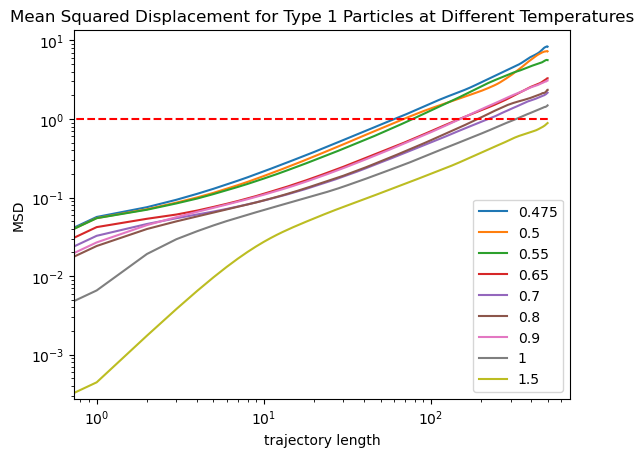

In [72]:
for i, data in enumerate(msd_vals):
    
    plt.loglog(data, label=f'{temps[i]}')

    plt.legend()
    plt.xlabel('trajectory length')
    plt.ylabel('MSD')
    plt.title('Mean Squared Displacement for Type 1 Particles at Different Temperatures')

plt.plot(np.linspace(0,500), np.ones(50), 'r--')
plt.savefig('Mean squared displacement')
plt.show()

In [104]:
#find where MSD=1

import numpy as np

msd1=[]
times=[]

for data in msd_vals:
    data = np.array(data)
    
    vals=[]
    for idx, val in enumerate(data):
        vals.append((val-1)**2)
        
    minposition = vals.index(min(vals))
    msd1.append(data[minposition])
    times.append(minposition)

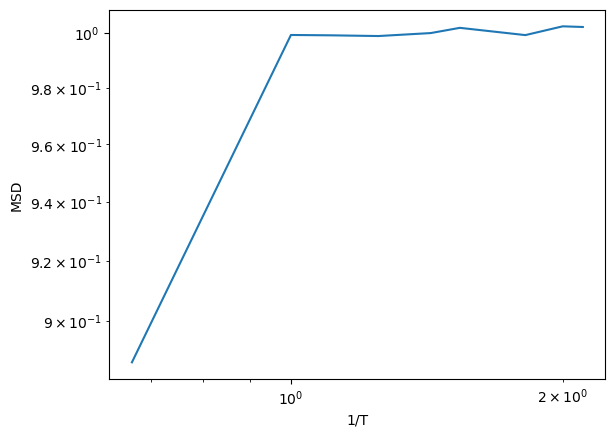

In [111]:
plt.loglog([1/t for t in temps], msd1)
plt.xlabel('1/T')
plt.ylabel('MSD')
plt.savefig('1\T vs MSD=1')
plt.show()

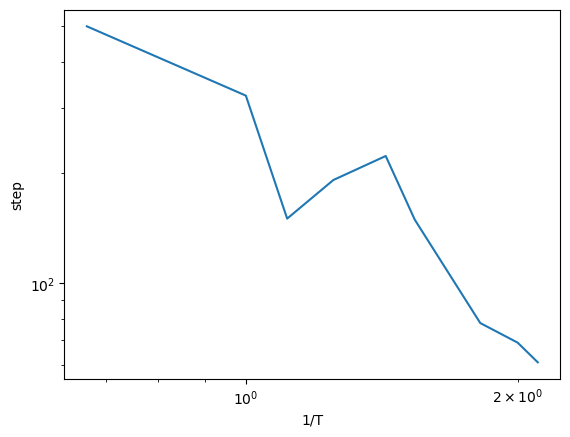

In [113]:
plt.loglog([1/t for t in temps], times)
plt.xlabel('1/T')
plt.ylabel('step')
plt.savefig('1\T vs time for MSD=1')
plt.show()